# House holding price prediction

aim predict the sale price of a house

Features 80

MSSubClass,
MSZoning,
LotFrontage,
LotArea,
Street,
Alley,
LotShape,
LandContour,
Utilities,
LotConfig,
LandSlope,
Neighborhood,
Condition1,
Condition2,
BldgType,
HouseStyle,
OverallQual,
OverallCond,
YearBuilt,
YearRemodAdd,
RoofStyle,
RoofMatl,
Exterior1st,
Exterior2nd,
MasVnrType,
MasVnrArea,
ExterQual,
ExterCond,
Foundation,
BsmtQual,
BsmtCond,
BsmtExposure,
BsmtFinType1,
BsmtFinSF1,
BsmtFinType2,
BsmtFinSF2,
BsmtUnfSF,
TotalBsmtSF,
Heating,
HeatingQC,
CentralAir,
Electrical,
1stFlrSF,
2ndFlrSF,
LowQualFinSF,
GrLivArea,
BsmtFullBath,
BsmtHalfBath,
FullBath,
HalfBath,
Bedroom,
Kitchen,
KitchenQual,
TotRmsAbvGrd,
Functional,
Fireplaces,
FireplaceQu,
GarageType,
GarageYrBlt,
GarageFinish,
GarageCars,
GarageArea,
GarageQual,
GarageCond,
PavedDrive,
WoodDeckSF,
OpenPorchSF,
EnclosedPorch,
3SsnPorch,
ScreenPorch,
PoolArea,
PoolQC,
Fence,
MiscFeature,
MiscVal,
MoSold,
YrSold,
SaleType,
SaleCondition

#### Kaggle dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# ------------------------------------------Importing libraries------------------------------------------

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ------------------------------------------Getting dataset------------------------------------------

In [43]:
# load dataset
data = pd.read_csv('train.csv')
x = data.drop(['SalePrice'], axis = 1)
y = data['SalePrice']

data2 = pd.read_csv('test.csv')

**------------------------------------------------------------------------Looking into dataset--------------------------------------------------------------------**

# ------------------------------------------number of columns & rows------------------------------------------

In [44]:
# check shape
print(data.shape)
print(data2.shape)

(1460, 81)
(1459, 80)


In [45]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [46]:
data2.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


**------------------------------------------Number of columns in train data is 81------------------------------------------**

**------------------------------------------Number of rows in train data is 1460------------------------------------------**

**------------------------------------------Number of columns in train data is 80------------------------------------------**

**------------------------------------------Number of crows in train data is 1459------------------------------------------**

# ------------------------------------------Spliting the data in 80/20 ratio------------------------------------------

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [48]:
train_data = x_train.join(y_train)
train_data.shape

(1168, 81)

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

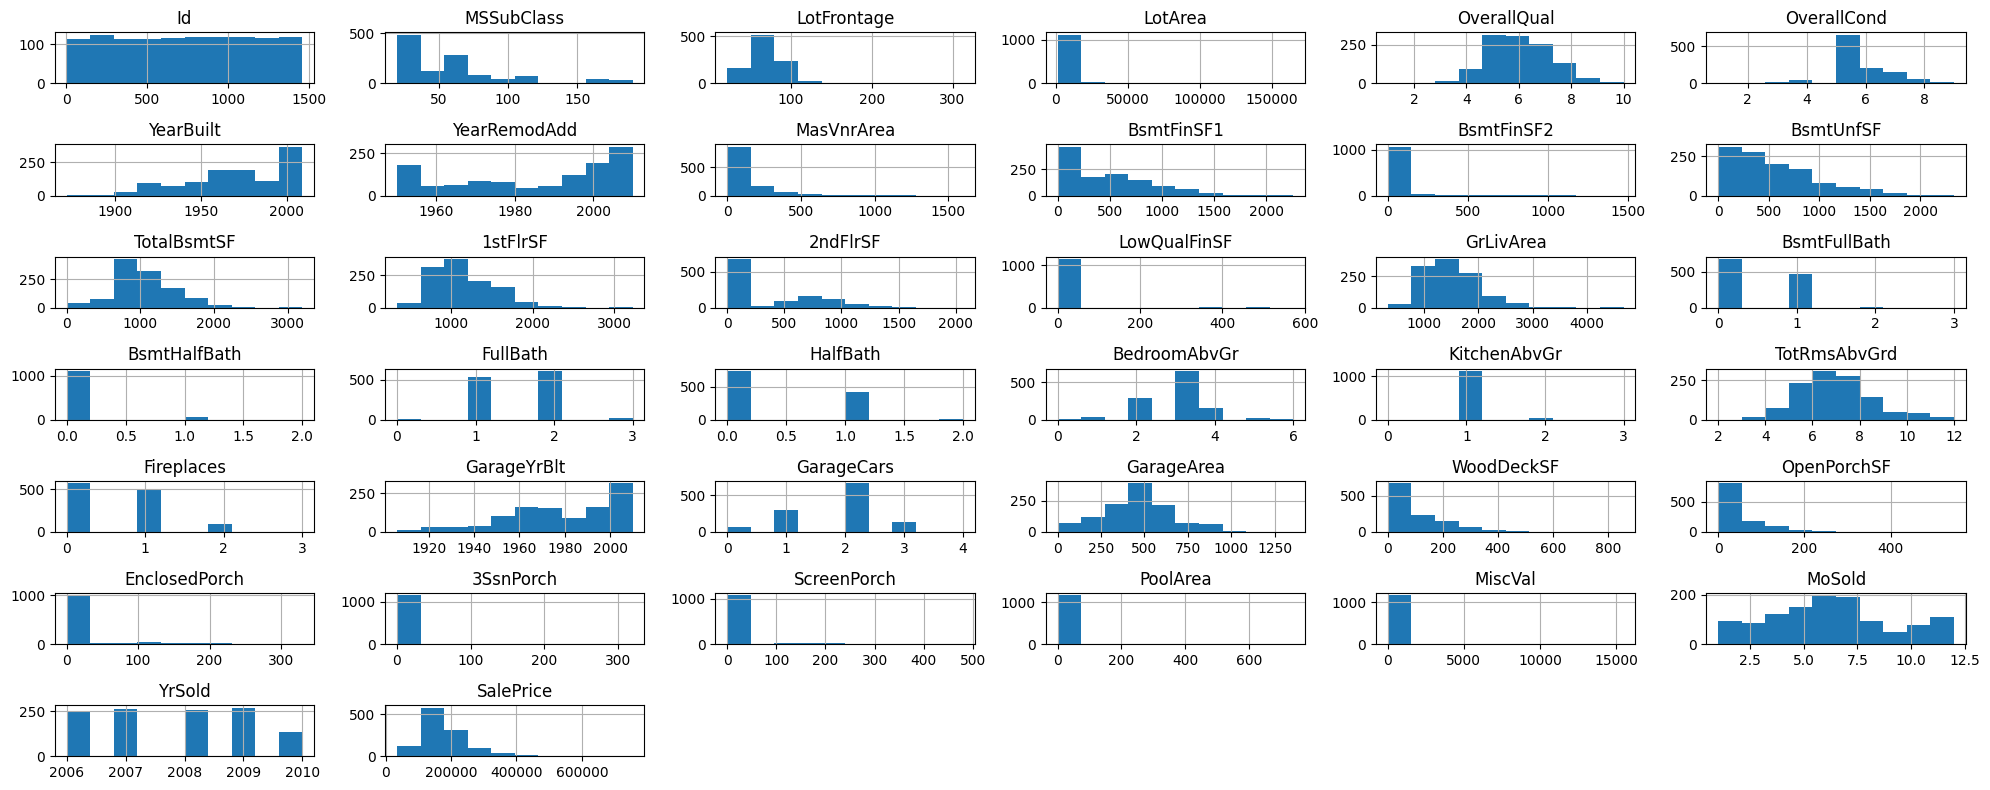

In [49]:
plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
train_data.hist()

# ------------------------------------------The actual values of house price------------------------------------------

In [50]:
print(data['SalePrice'].head(10))

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64


## Getting the dummy variables

In [51]:
train_data = pd.get_dummies(train_data)
train_data.shape

(1168, 283)

<ipython-input-52-2db2d61b4657>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')


<Axes: >

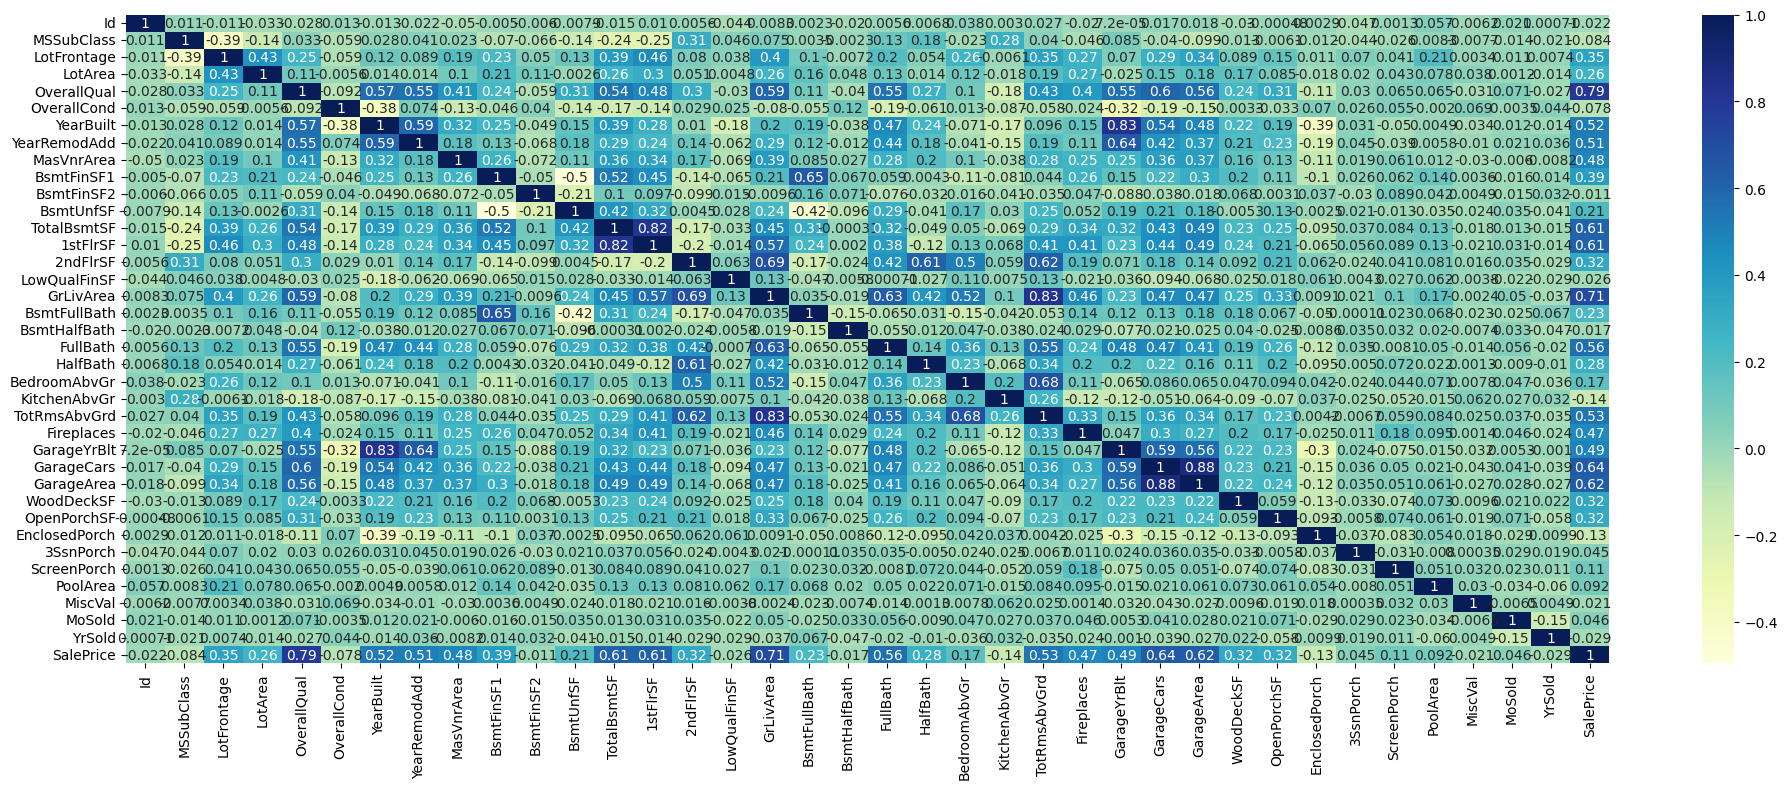

In [52]:
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')

In [53]:
from sklearn.linear_model import LinearRegression


x_train= data.drop(['SalePrice'], axis = 1)
y_train = data['SalePrice']

x_train = x_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')
x_train = x_train.fillna("0")
y_train = y_train.fillna("0")

In [54]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [55]:
train_data.shape

(1168, 283)

# Visualizing the set results

# ---------------------------------------Test Data--------------------------------------

In [57]:
test_data = x_test.join(y_test)

In [58]:
test_data = pd.get_dummies(test_data)
test_data.shape

(292, 251)

In [59]:
x_test = x_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.apply(pd.to_numeric, errors='coerce')
x_test = x_test.fillna("0")
y_test = y_test.fillna("0")

In [60]:
submit = pd.DataFrame()
submit['predicted values'] = y_test
submit['real values'] = y_train
submit.to_csv('submission', index = True)

In [61]:
submit

,predicted values,real values
1304,130000,130000
1155,218000,218000
741,142000,142000
130,226000,226000
1310,335000,335000
...,...,...
116,139000,139000
629,168500,168500
449,120000,120000
424,139000,139000


<Axes: >

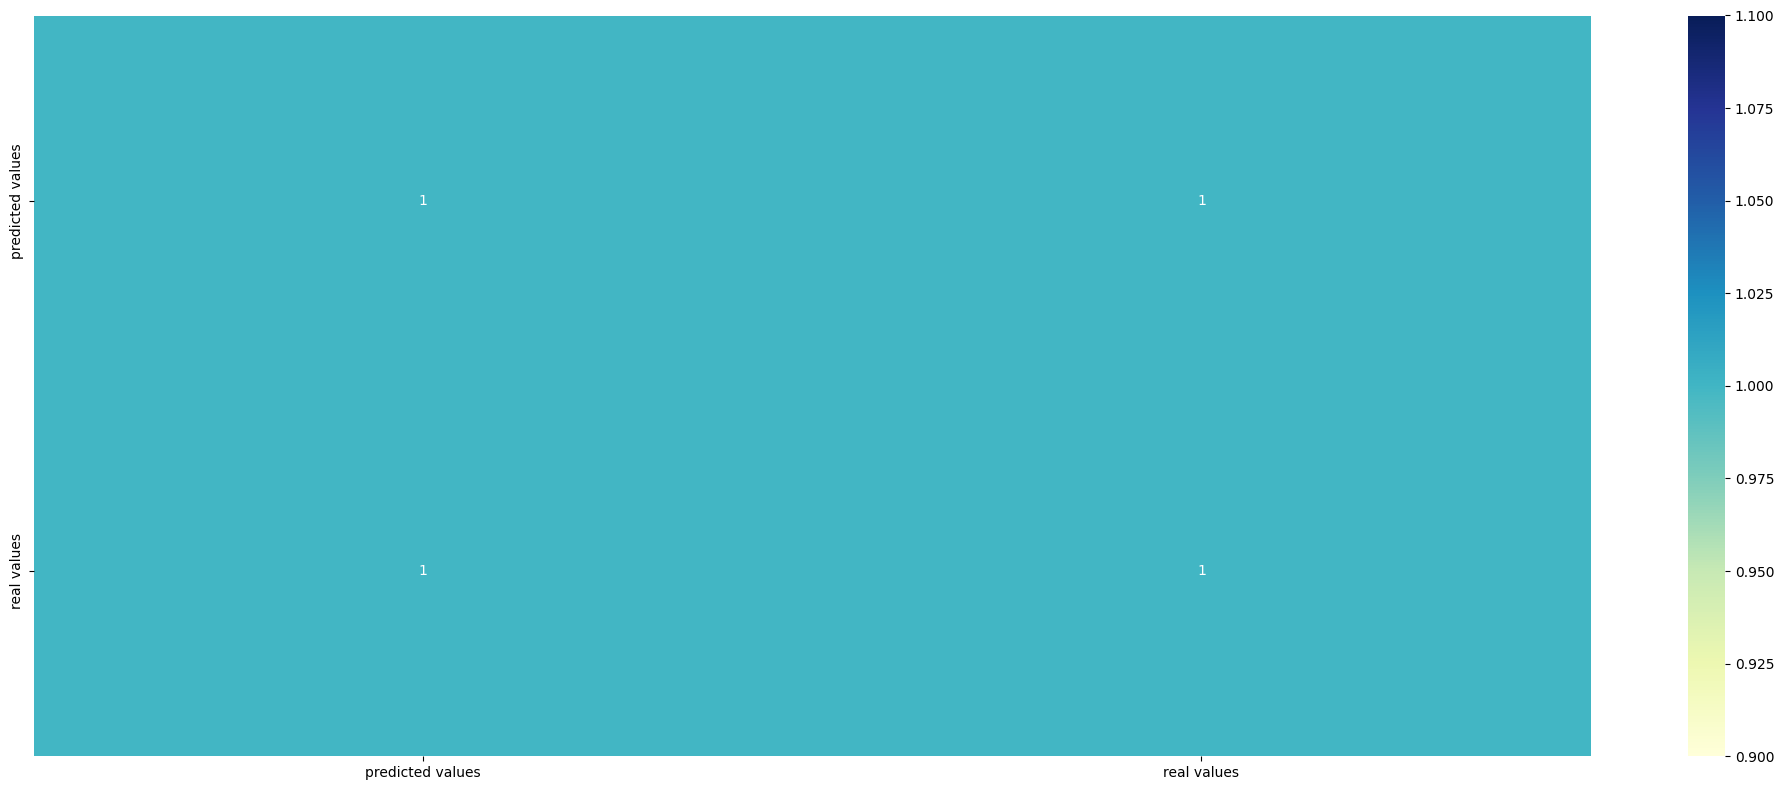

In [62]:
sns.heatmap(submit.corr(), annot = True, cmap = 'YlGnBu')

<Axes: xlabel='Id', ylabel='SalePrice'>

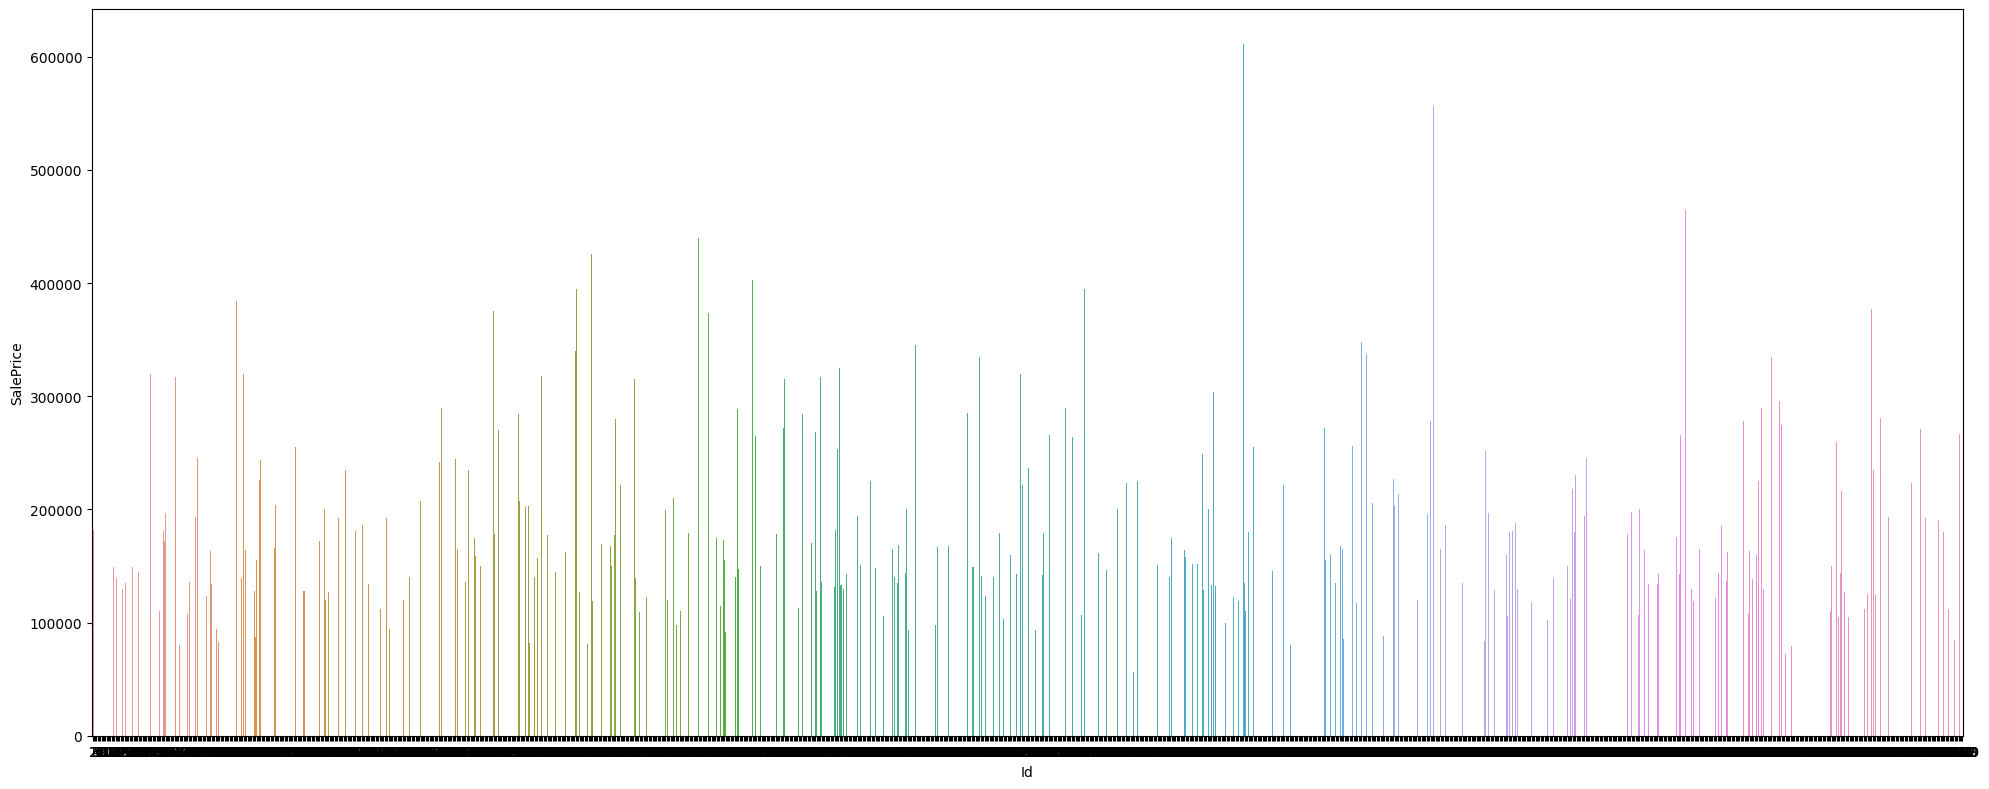

In [64]:
sns.barplot(x = data['Id'], y = y_test)